In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_laliga_model = pd.read_csv('/content/drive/My Drive/xgoals/laliga_model.csv', low_memory= False)

In [ ]:
df_laliga_model

,id_shoot,gk_dis,pla_dis,goal_dis,goal_ang,goalkeeper_overcoming_angle,closest_player_angle,shot_body_part,shot_type,Qt_rivals_cone,Qt_teammate_cone,under_pressure,shot_first_time,shot_one_on_one,Target,shot_statsbomb_xg
0,c5341577-e1ca-4742-98fb-dc745cbbe103,8.273452,2.863564,13.926952,19.470701,1.958496,108.756059,Right Foot,Open Play,1,0,NaN,NaN,True,0,0.200969
1,1aedaf9e-bc12-4d0a-953d-bd0f7db3688a,15.682155,6.525335,17.831433,19.332894,2.068917,71.250088,Right Foot,Open Play,1,0,NaN,True,NaN,0,0.096384
2,96b28bfc-d174-4b38-86cf-5a43cda4a14f,14.725828,2.800000,15.839823,25.135121,5.875399,68.767108,Left Foot,Open Play,2,0,NaN,True,NaN,0,0.098879
3,b9ca5464-1f5a-401b-a31d-8101bd61072a,22.121935,10.231324,22.102036,19.806729,0.197864,6.525874,Left Foot,Free Kick,8,1,NaN,NaN,NaN,0,0.078938
4,75bdc651-c041-4021-b201-cb9eb8b97837,8.296987,8.296987,2.549510,122.607287,144.367245,144.367245,Left Foot,Open Play,0,0,NaN,NaN,True,1,0.976192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20976,5fa17856-9fcc-484e-9b2c-a5a87f475c73,17.140595,4.522168,15.794303,19.765170,2.086807,4.506434,Right Foot,Open Play,2,0,NaN,NaN,NaN,0,0.092134
20977,6af58f7e-48b4-4d53-acc8-2109146ca66e,8.905055,1.000000,10.404807,42.473386,6.516940,45.317425,Head,Open Play,1,0,True,NaN,NaN,0,0.108684
20978,df1ab8fe-ee57-4d40-8503-643762285469,23.438857,2.451530,21.317833,11.051123,2.701769,23.742144,Left Foot,Open Play,1,0,NaN,NaN,NaN,0,0.011345
20979,d3c824f4-c9fc-40fb-8997-9377a8407ad2,15.955250,5.544367,14.759743,21.053727,1.176088,0.359121,Left Foot,Open Play,2,0,NaN,True,NaN,0,0.106139


In [ ]:
df_laliga_model.shape

(20981, 16)

**Exploratory Data Analysis**

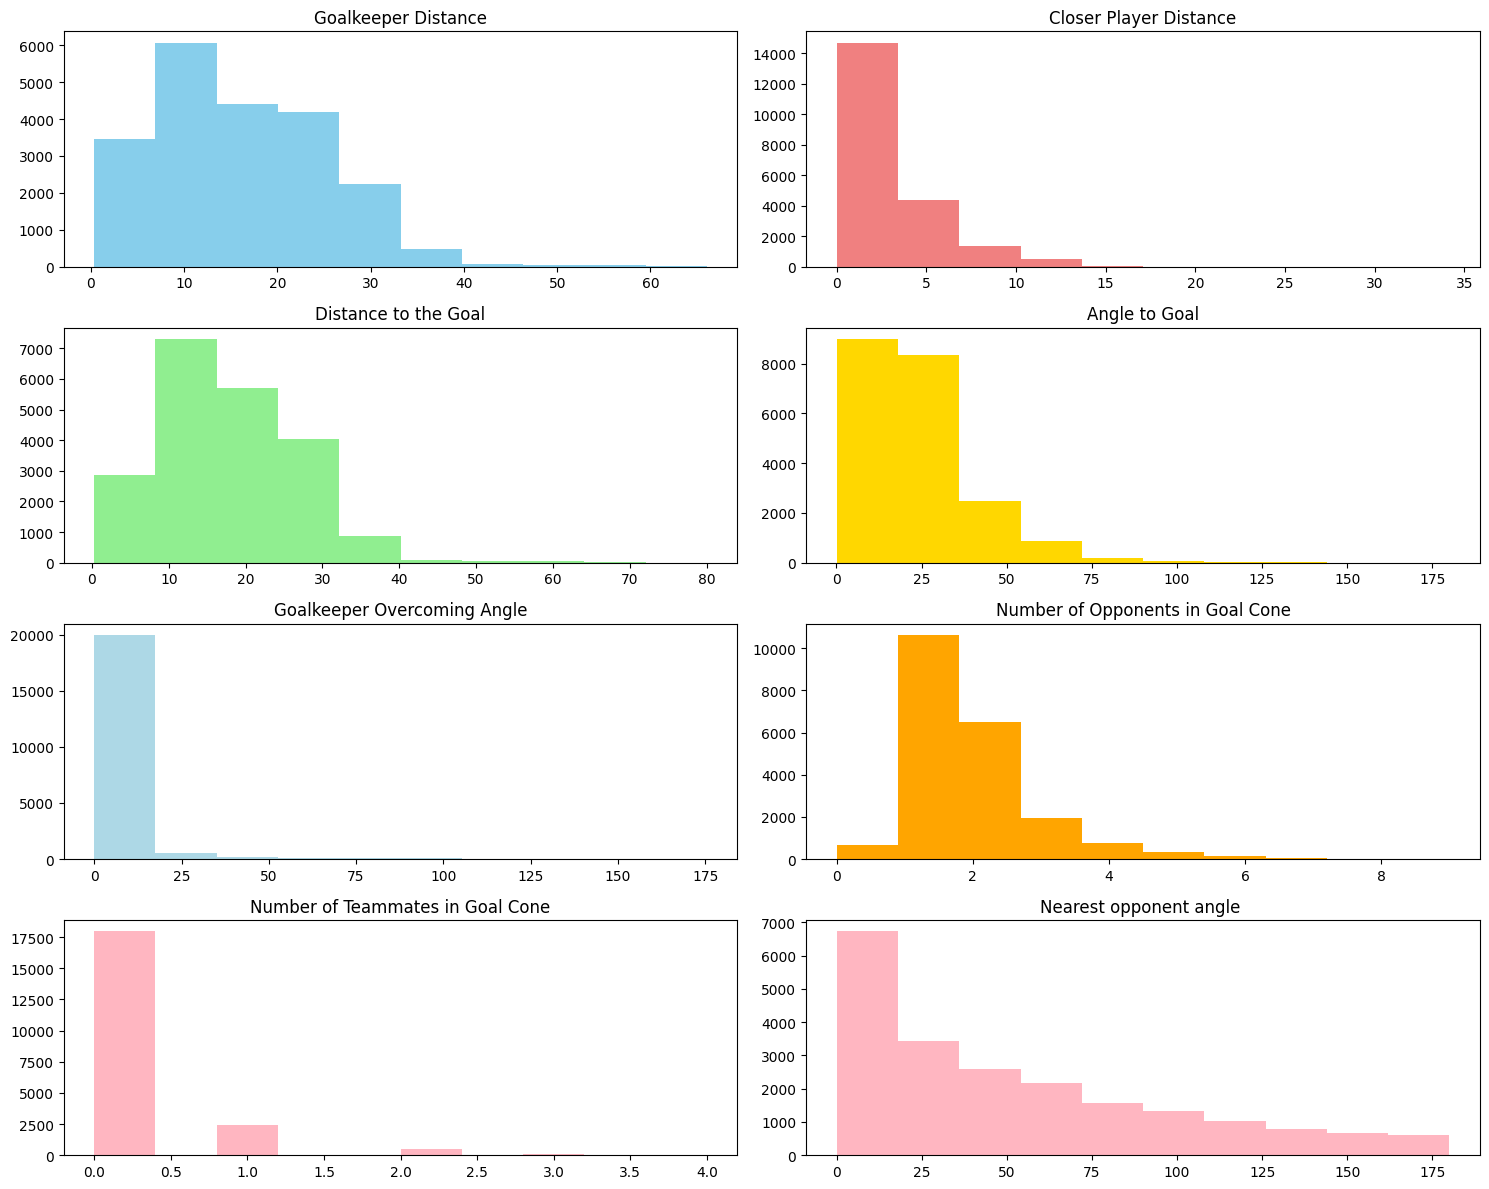

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(4, 2, 1)
plt.title("Goalkeeper Distance")
plt.hist(df_laliga_model.gk_dis, color='skyblue')

plt.subplot(4, 2, 2)
plt.title("Closer Player Distance")
plt.hist(df_laliga_model.pla_dis, color='lightcoral')

plt.subplot(4, 2, 3)
plt.title("Distance to the Goal")
plt.hist(df_laliga_model.goal_dis, color='lightgreen')

plt.subplot(4, 2, 4)
plt.title("Angle to Goal")
plt.hist(df_laliga_model.goal_ang, color='gold')

plt.subplot(4, 2, 5)
plt.title("Goalkeeper Overcoming Angle")
plt.hist(df_laliga_model.goalkeeper_overcoming_angle, color='lightblue')

plt.subplot(4, 2, 6)
plt.title("Number of Opponents in Goal Cone")
plt.hist(df_laliga_model.Qt_rivals_cone, color='orange')

plt.subplot(4, 2, 7)
plt.title("Number of Teammates in Goal Cone")
plt.hist(df_laliga_model.Qt_teammate_cone, color='lightpink')

plt.subplot(4, 2, 8)
plt.title("Nearest opponent angle ")
plt.hist(df_laliga_model.closest_player_angle, color='lightpink')

plt.tight_layout()
plt.show()



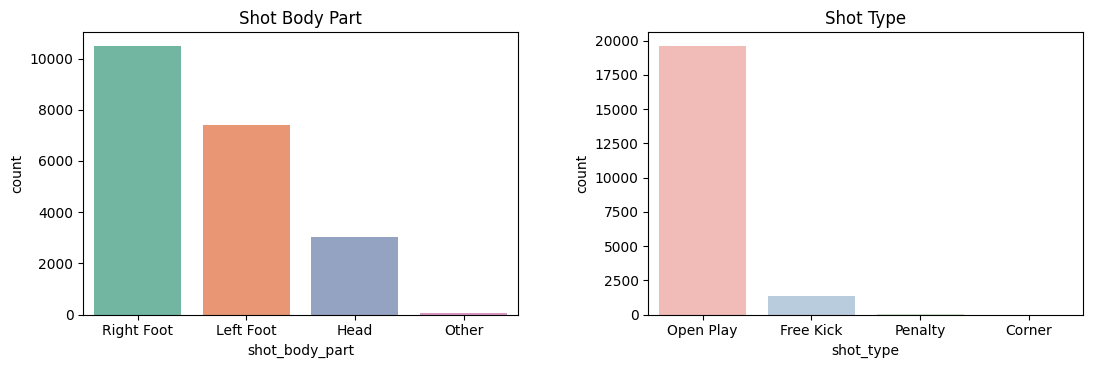

In [ ]:
body_part_palette = sns.color_palette("Set2")
shot_type_palette = sns.color_palette("Pastel1")

plt.figure(figsize=(20, 25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8, wspace=0.3, hspace=0.3)

plt.subplot(5, 2, 1)
plt.title("Shot Body Part")
sns.countplot(data=df_laliga_model, x="shot_body_part", palette=body_part_palette)

plt.subplot(5, 2, 2)
plt.title("Shot Type")
sns.countplot(data=df_laliga_model, x="shot_type", palette=shot_type_palette)

plt.show()


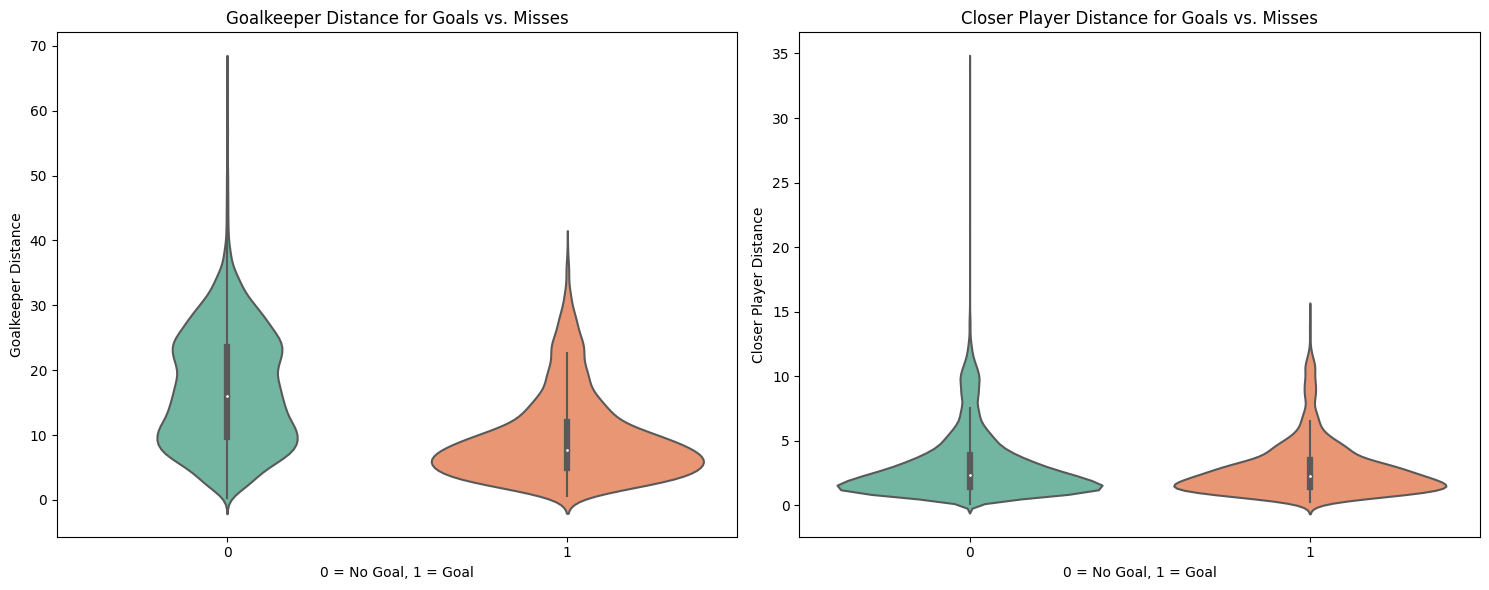

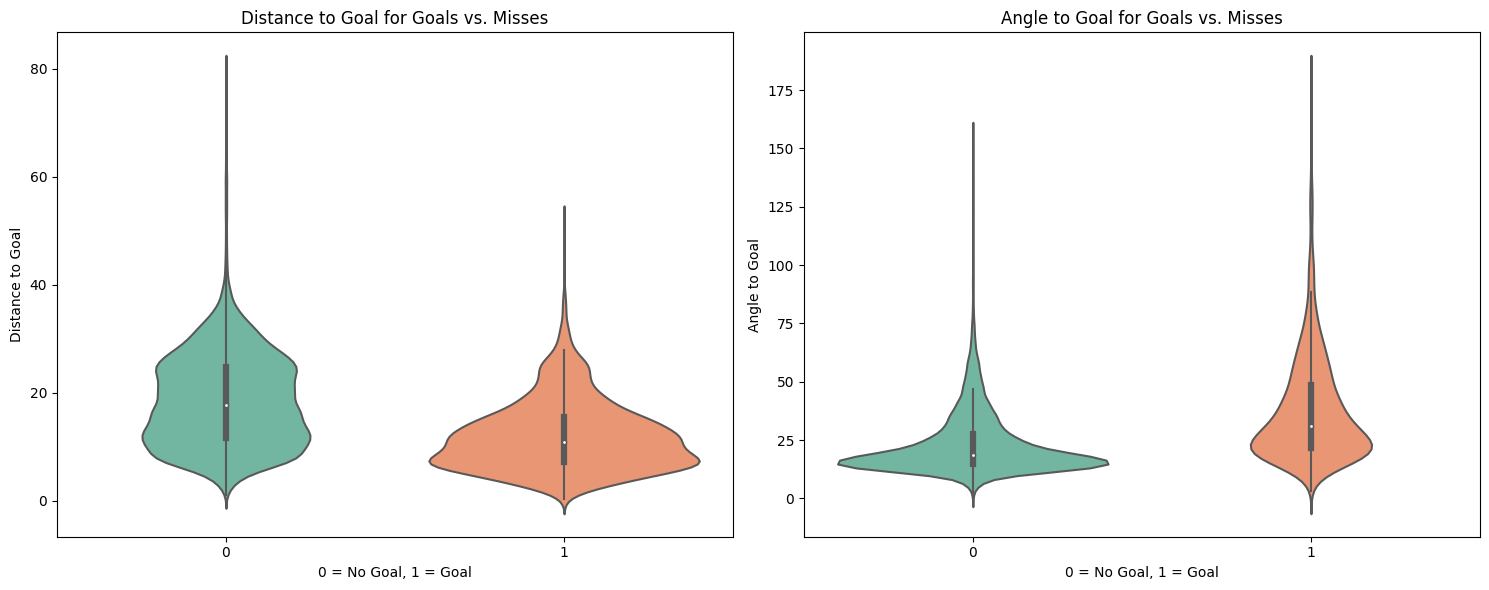

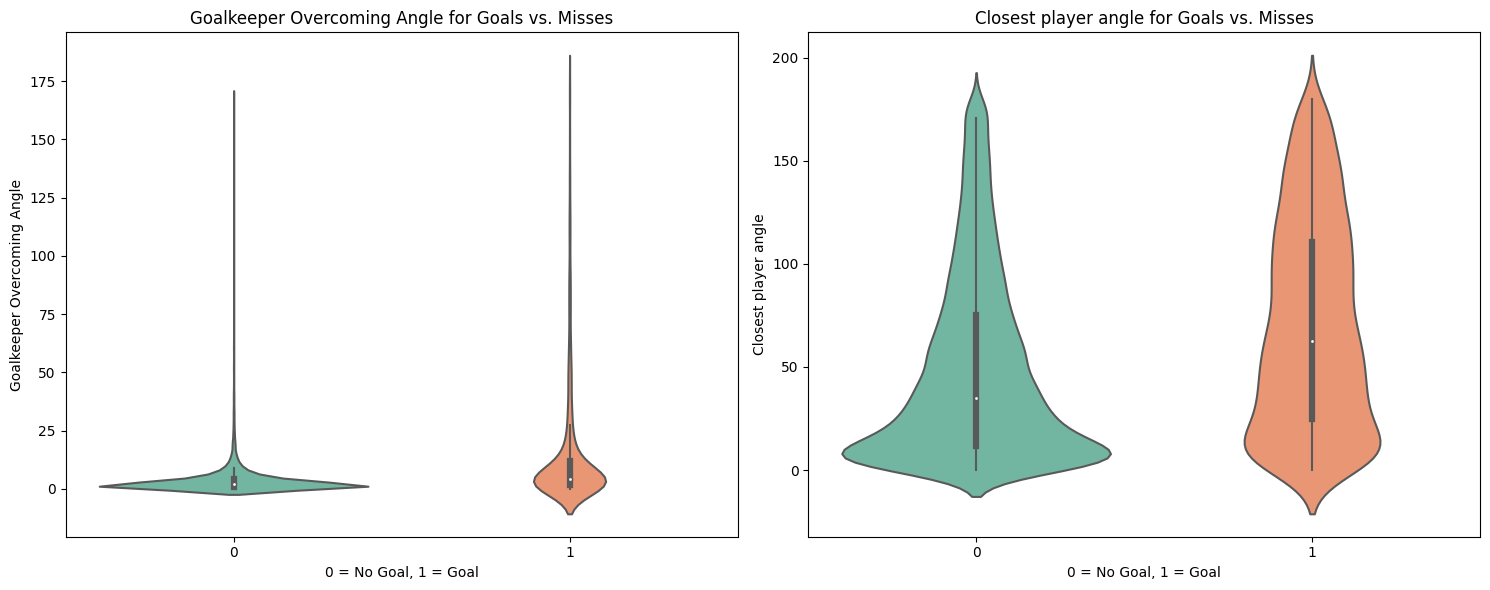

In [ ]:
plt.figure(figsize=(15, 6))

# Feature 1: gk_dis
plt.subplot(1, 2, 1)
sns.violinplot(x='Target', y='gk_dis', data=df_laliga_model, palette='Set2')
plt.xlabel('0 = No Goal, 1 = Goal')
plt.ylabel('Goalkeeper Distance')
plt.title('Goalkeeper Distance for Goals vs. Misses')

# Feature 2: pla_dis
plt.subplot(1, 2, 2)
sns.violinplot(x='Target', y='pla_dis', data=df_laliga_model, palette='Set2')
plt.xlabel('0 = No Goal, 1 = Goal')
plt.ylabel('Closer Player Distance')
plt.title('Closer Player Distance for Goals vs. Misses')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 6))

# Feature 3: goal_dis
plt.subplot(1, 2, 1)
sns.violinplot(x='Target', y='goal_dis', data=df_laliga_model, palette='Set2')
plt.xlabel('0 = No Goal, 1 = Goal')
plt.ylabel('Distance to Goal')
plt.title('Distance to Goal for Goals vs. Misses')

# Feature 4: goal_ang
plt.subplot(1, 2, 2)
sns.violinplot(x='Target', y='goal_ang', data=df_laliga_model, palette='Set2')
plt.xlabel('0 = No Goal, 1 = Goal')
plt.ylabel('Angle to Goal')
plt.title('Angle to Goal for Goals vs. Misses')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 6))

# Feature 5: goalkeeper_overcoming_angle
plt.subplot(1, 2, 1)
sns.violinplot(x='Target', y='goalkeeper_overcoming_angle', data=df_laliga_model, palette='Set2')
plt.xlabel('0 = No Goal, 1 = Goal')
plt.ylabel('Goalkeeper Overcoming Angle')
plt.title('Goalkeeper Overcoming Angle for Goals vs. Misses')

# Feature 6: Closest player angle
plt.subplot(1, 2, 2)
sns.violinplot(x='Target', y='closest_player_angle', data=df_laliga_model, palette='Set2')
plt.xlabel('0 = No Goal, 1 = Goal')
plt.ylabel('Closest player angle')
plt.title('Closest player angle for Goals vs. Misses')

plt.tight_layout()
plt.show()


**Model Correlation**

<ipython-input-7-a7ff13b74e0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_laliga_model_corr = df_laliga_model.corr()


<Axes: >

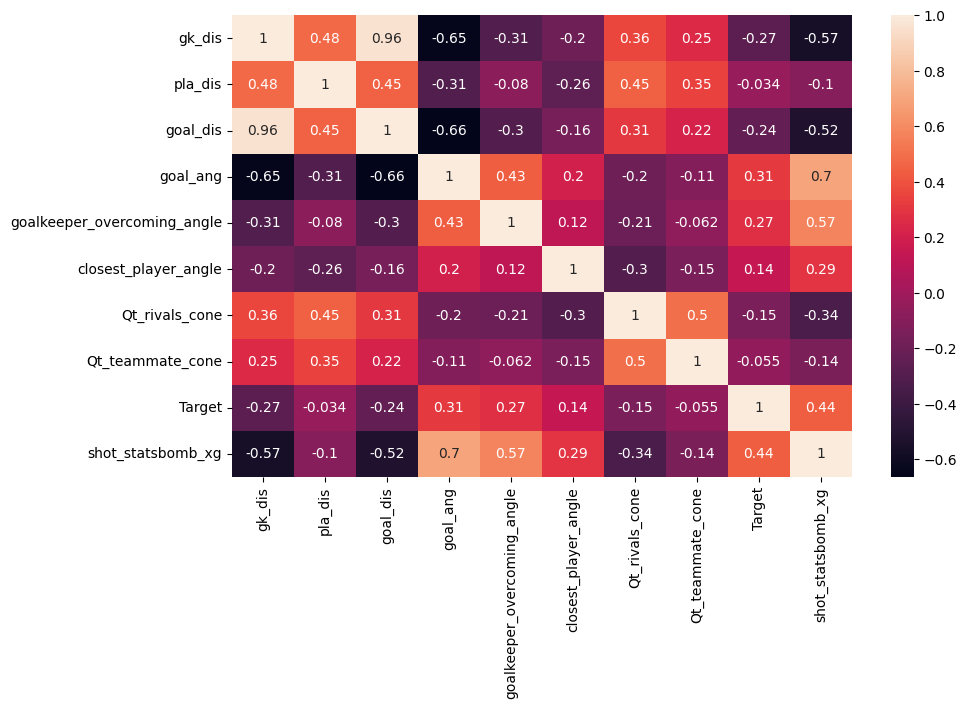

In [ ]:
df_laliga_model_corr = df_laliga_model.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_laliga_model_corr, annot = True)

## **Data Preprocessing**

**Imports**


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
df_laliga_model.isnull().sum()

id_shoot                           0
gk_dis                             0
pla_dis                            0
goal_dis                           0
goal_ang                           0
goalkeeper_overcoming_angle        5
closest_player_angle              45
shot_body_part                     0
shot_type                          0
Qt_rivals_cone                     0
Qt_teammate_cone                   0
under_pressure                 17221
shot_first_time                14283
shot_one_on_one                19563
Target                             0
shot_statsbomb_xg                  0
dtype: int64

In [ ]:
df_laliga_model.drop(["under_pressure", "shot_first_time", "shot_one_on_one", "shot_body_part", "shot_type"], axis=1, inplace=True)

In [ ]:
df_laliga_model = df_laliga_model.dropna(subset=['goalkeeper_overcoming_angle', 'closest_player_angle'])


In [ ]:
df_laliga_model.shape

(20931, 11)

In [ ]:
df_laliga_model.set_index("id_shoot", inplace = True)
# df_laliga_model_encoded = pd.get_dummies(df_laliga_model, columns = ["shot_body_part", "shot_type"], drop_first=True)
X = df_laliga_model.drop(["Target", "shot_statsbomb_xg"], axis =1)
y = df_laliga_model["Target"]==1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [ ]:
y.value_counts(normalize= True)

False    0.882471
True     0.117529
Name: Target, dtype: float64

In [ ]:
df_laliga_model.head(10)

,gk_dis,pla_dis,goal_dis,goal_ang,goalkeeper_overcoming_angle,closest_player_angle,Qt_rivals_cone,Qt_teammate_cone,Target,shot_statsbomb_xg
id_shoot,,,,,,,,,,
c5341577-e1ca-4742-98fb-dc745cbbe103,8.273452,2.863564,13.926952,19.470701,1.958496,108.756059,1,0,0,0.200969
1aedaf9e-bc12-4d0a-953d-bd0f7db3688a,15.682155,6.525335,17.831433,19.332894,2.068917,71.250088,1,0,0,0.096384
96b28bfc-d174-4b38-86cf-5a43cda4a14f,14.725828,2.800000,15.839823,25.135121,5.875399,68.767108,2,0,0,0.098879
b9ca5464-1f5a-401b-a31d-8101bd61072a,22.121935,10.231324,22.102036,19.806729,0.197864,6.525874,8,1,0,0.078938
75bdc651-c041-4021-b201-cb9eb8b97837,8.296987,8.296987,2.549510,122.607287,144.367245,144.367245,0,0,1,0.976192
5eeab880-4efe-4bcf-bf43-f894f508c31b,5.731492,0.640312,7.648529,59.821068,0.216209,134.452605,1,0,0,0.203073
6edda5fc-a9ad-4115-994c-27376367c274,18.051039,9.265528,18.853382,23.984619,4.676284,11.708617,7,0,0,0.095015
8c5df876-6d67-4493-aab9-ee47c4ac9711,34.364226,4.494441,35.351096,12.885083,0.099013,118.871126,3,0,0,0.017764
510062b4-1210-46eb-b400-8dd0631b07b8,13.823531,0.412311,15.023315,25.148228,5.903354,50.183530,1,0,0,0.112452


In [ ]:
sm = SMOTE(random_state=42)

Smote = 'Yes'

if Smote == 'Yes':
    X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

## **Logistic Regression**

**Imports**

In [10]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42, max_iter=1000)
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import plotly.graph_objects as go


In [ ]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
model_lr.score(X_train, y_train)

0.7314564158094207

In [ ]:
model_lr.score(X_test, y_test)

0.7444470981609744

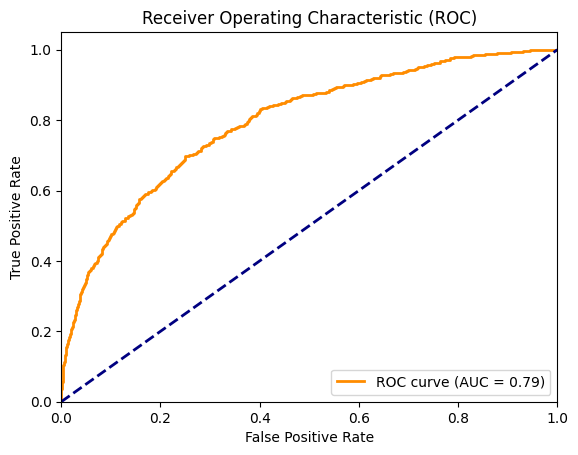

In [ ]:
# ROC Curve Logistic Regression

y_prob = model_lr.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# AUC value
roc_auc = auc(fpr, tpr)

# ROC Curve Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:

target_names = ['No Goal', 'Goal']
print(classification_report(y_test, model_lr.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     No Goal       0.95      0.75      0.84      3695
        Goal       0.27      0.69      0.39       492

    accuracy                           0.74      4187
   macro avg       0.61      0.72      0.61      4187
weighted avg       0.87      0.74      0.79      4187



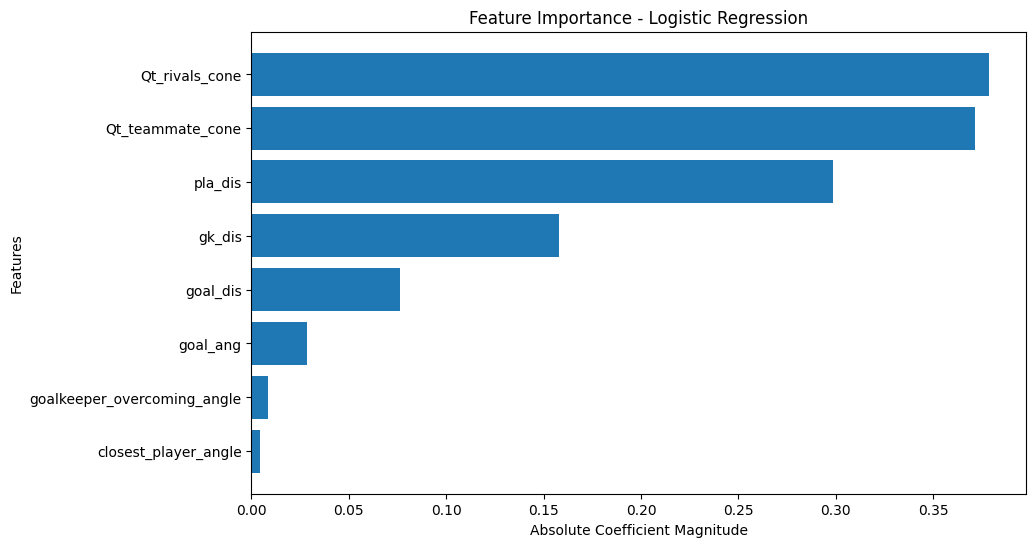

In [ ]:

# Feature Importance Logistic Regression

coefficients = model_lr.coef_[0]  # Coefficients for the first class

# Absolute magnitude of coefficients
absolute_coefficients = np.abs(coefficients)

# Sort feature names
sorted_indices = np.argsort(absolute_coefficients)

# Feature names
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(absolute_coefficients)), absolute_coefficients[sorted_indices], align='center')
plt.yticks(range(len(absolute_coefficients)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance - Logistic Regression')
plt.show()



In [ ]:

# Coefficients and feature names
coefficients = model_lr.coef_[0]  # Coefficients for the first class
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
intercept = model_lr.intercept_[0]

coef_df



,Feature,Coefficient
1,pla_dis,0.298304
2,goal_dis,0.076288
3,goal_ang,0.028689
4,goalkeeper_overcoming_angle,0.008298
5,closest_player_angle,0.004451
0,gk_dis,-0.157665
7,Qt_teammate_cone,-0.371651
6,Qt_rivals_cone,-0.378847


In [ ]:
model_lr.intercept_[0]

-0.556536465555079

**Model Calibration**

Calibrated Model Log Loss: 0.5380734863942211
Original Model Log Loss: 0.5389725817180567


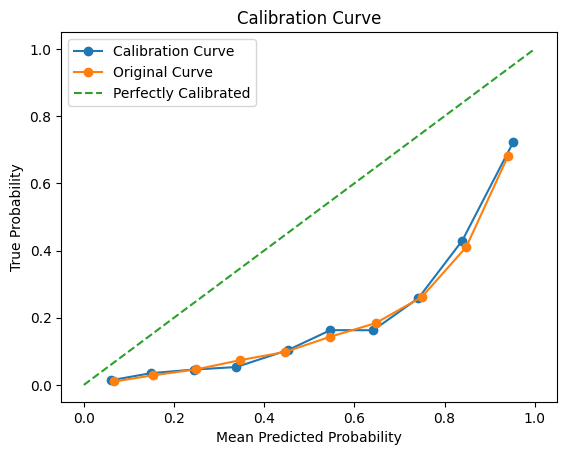

In [ ]:

calibrated_model = CalibratedClassifierCV(estimator=model_lr, method='isotonic', cv=10)
calibrated_model.fit(X_train, y_train)


#calibrated probabilities for the test set
calibrated_probabilities = calibrated_model.predict_proba(X_test)
original_probabilities = model_lr.predict_proba(X_test)


#calibrated model log loss
calibrated_log_loss = log_loss(y_test, calibrated_probabilities)
print(f"Calibrated Model Log Loss: {calibrated_log_loss}")

#original model log loss
original_log_loss = log_loss(y_test, original_probabilities)
print(f"Original Model Log Loss: {original_log_loss}")


# calibrated and original probabilities for the test set
calibrated_probabilities = calibrated_model.predict_proba(X_test)[:, 1]
original_probabilities = model_lr.predict_proba(X_test)[:, 1]

# calibration curve
true_probabilities, predicted_probabilities = calibration_curve(y_test, calibrated_probabilities, n_bins=10)
true_original_probabilities, predicted_original_probabilities = calibration_curve(y_test, original_probabilities, n_bins=10)

#perfectly calibrated curve
diagonal_line = np.linspace(0, 1, 100)

# Plotcalibration curve
plt.plot(predicted_probabilities, true_probabilities, marker='o', label='Calibration Curve')
plt.plot(predicted_original_probabilities, true_original_probabilities, marker='o', label='Original Curve')
plt.plot(diagonal_line, diagonal_line, linestyle='--', label='Perfectly Calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

**Probability Distribution**

In [ ]:

original_probabilities = model_lr.predict_proba(X_test)[:, 1]

proba_0 = original_probabilities[y_test == 0]
proba_1 = original_probabilities[y_test == 1]

# Histogram
trace1 = go.Histogram(x=proba_0, opacity=0.5, name='Target 0', marker=dict(color='red'))
trace2 = go.Histogram(x=proba_1, opacity=0.5, name='Target 1', marker=dict(color='blue'))

layout = go.Layout(title='Probability distribution',
                   xaxis=dict(title='Probabilty'),
                   yaxis=dict(title='Frecuence'),
                   barmode='overlay')

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

fig.show()

**StatsBomb Model Comparison**

In [ ]:
import plotly.graph_objects as go

statsbomb_probabilities = df_laliga_model['shot_statsbomb_xg']

proba_0 = statsbomb_probabilities[df_laliga_model['Target'] == 0]
proba_1 = statsbomb_probabilities[df_laliga_model['Target'] == 1]

#histogram
trace1 = go.Histogram(x=proba_0, opacity=0.5, name='Target 0', marker=dict(color='red'))
trace2 = go.Histogram(x=proba_1, opacity=0.5, name='Target 1', marker=dict(color='blue'))

layout = go.Layout(title='Probability distribution (StatsBomb Model)',
                   xaxis=dict(title='Probability'),
                   yaxis=dict(title='Frequency'),
                   barmode='overlay')

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

fig.show()


In [ ]:
original_probabilities = model_lr.predict_proba(X_test)[:, 1]
import plotly.graph_objects as go

# Histogram
trace1 = go.Histogram(x=original_probabilities, opacity=0.5, name='My Model Original', marker=dict(color='orange'))
trace2 = go.Histogram(x=df_laliga_model['shot_statsbomb_xg'], opacity=0.5, name='StatsBombModel', marker=dict(color='green'))

layout = go.Layout(title='Probabilyty Distribution: Model Original Vs StatsBomb Model',
                   xaxis=dict(title='Probability'),
                   yaxis=dict(title='Frequence'),
                   barmode='overlay')

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

fig.show()

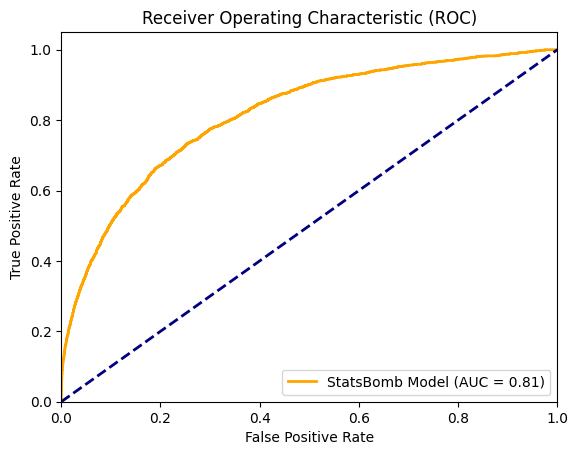

In [ ]:
# ROC Curve Statsbomb Model

# StatsBomb model Probability
y_prob_statsbomb = df_laliga_model['shot_statsbomb_xg']

# Calculate the ROC curve for StatsBomb model
fpr_statsbomb, tpr_statsbomb, _ = roc_curve(y, y_prob_statsbomb)

# Calculate the AUC for StatsBomb model
roc_auc_statsbomb = auc(fpr_statsbomb, tpr_statsbomb)

# Plot the ROC curve for both models
plt.figure()
plt.plot(fpr_statsbomb, tpr_statsbomb, color='orange', lw=2, label=f'StatsBomb Model (AUC = {roc_auc_statsbomb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_true = df_laliga_model['Target']==1
y_pred_statsbomb = (df_laliga_model['shot_statsbomb_xg'] > 0.5).astype(int)

# classification report Statsbomb Model
report_statsbomb = classification_report(y_true, y_pred_statsbomb)

print("Classification Report for StatsBomb Model:")
print(report_statsbomb)

Classification Report for StatsBomb Model:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     18471
        True       0.73      0.15      0.25      2460

    accuracy                           0.89     20931
   macro avg       0.81      0.57      0.60     20931
weighted avg       0.88      0.89      0.86     20931



In [ ]:
df_laliga_model = pd.read_csv('/content/drive/My Drive/xgoals/laliga_model.csv', low_memory= False)

## **Automatic Training**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [5]:
# Preprocessing
df_laliga_model.drop(["under_pressure", "shot_first_time", "shot_one_on_one", "shot_body_part", "shot_type"], axis=1, inplace=True)
df_laliga_model = df_laliga_model.dropna(subset=['goalkeeper_overcoming_angle', 'closest_player_angle'])
df_laliga_model.set_index("id_shoot", inplace=True)
X = df_laliga_model.drop(["Target", "shot_statsbomb_xg"], axis=1)
y = df_laliga_model["Target"] == 1

# Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Features scalation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Classification Models
models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': np.arange(100, 501, 100),
            'max_depth': np.arange(5, 16, 5),
            'min_samples_split': np.arange(2, 11, 2)
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': np.arange(5, 16, 5),
            'min_samples_split': np.arange(2, 11, 2)
        }
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'class_weight': [None, 'balanced']
        }
    },
    {
        'name': 'XGBoost',
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': np.arange(100, 501, 100),
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': np.arange(3, 8)
        }
    }
]

best_model_with_smote = None
best_score_with_smote = 0
best_model_without_smote = None
best_score_without_smote = 0

# randomized search to evaluate each model with different hyperparameters
for model_info in models:
    model = model_info['model']
    param_dist = model_info['params']

    # Train with SMOTE
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
    random_search.fit(X_train_resampled, y_train_resampled)

    # Check if model with SMOTE is best
    if random_search.best_score_ > best_score_with_smote:
        best_model_with_smote = random_search.best_estimator_
        best_score_with_smote = random_search.best_score_

    # Train without SMOTE
    model.fit(X_train_scaled, y_train)

    # Evaluate without SMOTE
    y_prob_positive_class = model.predict_proba(X_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob_positive_class)

    # Check if model without SMOTE is best
    if auc_score > best_score_without_smote:
        best_model_without_smote = model
        best_score_without_smote = auc_score

# Compare models
if best_score_with_smote >= best_score_without_smote:
    best_model = best_model_with_smote
    smote_used = True
else:
    best_model = best_model_without_smote
    smote_used = False

# Train selected model on the full training data
if smote_used:
    best_model.fit(X_train_resampled, y_train_resampled)
else:
    best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set and print classification report
y_pred = best_model.predict(X_test_scaled)
print(f"Best Model: {best_model.__class__.__name__} (SMOTE: {smote_used})")
print(f"Best Hyperparameters: {best_model.get_params()}")
print(f"Validation AUC Score (Positive Class): {best_score_with_smote if smote_used else best_score_without_smote}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Model: XGBClassifier (SMOTE: True)
Best Hyperparameters: {'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Validation AUC Score 

In [6]:
best_model.score(X_train_scaled, y_train)

0.9663760152890588

In [7]:
best_model.score(X_test_scaled, y_test)

0.8187246238356819

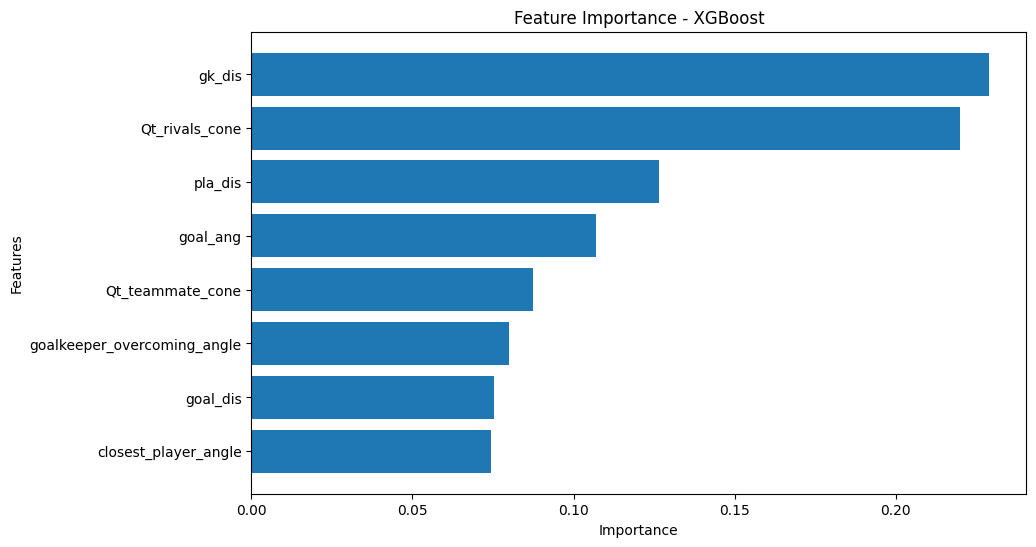

In [8]:
importance = best_model.feature_importances_

feature_names = X.columns

sorted_indices = np.argsort(importance)

# Plot Features Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_indices], align='center')
plt.yticks(range(len(importance)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost')
plt.show()

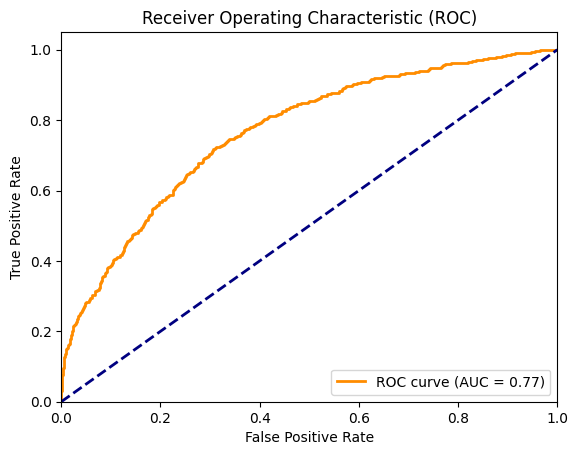

In [11]:
# Positive class probabilities
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# AUC values
roc_auc = auc(fpr, tpr)

# ROC Curve Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**XGBOOST Model Calibration**

Calibrated Model Log Loss: 0.29912796445664075
Original Model Log Loss: 0.40914824885137446


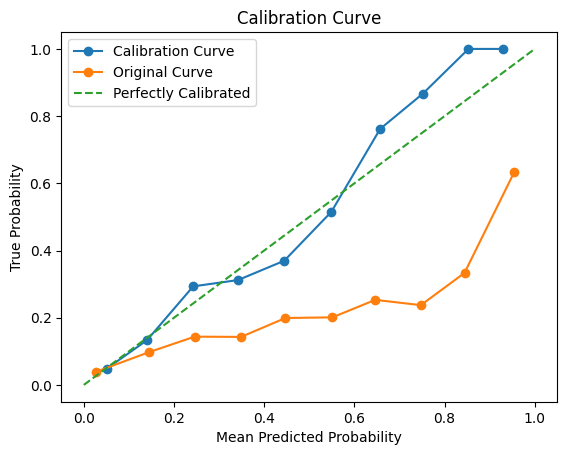

In [ ]:
calibrated_model = CalibratedClassifierCV(estimator=best_model, method='isotonic', cv=10)
calibrated_model.fit(X_train_scaled, y_train)


#calibrated probabilities for the test set
calibrated_probabilities = calibrated_model.predict_proba(X_test_scaled)
original_probabilities = best_model.predict_proba(X_test_scaled)


# Evaluate the calibrated model's log loss
calibrated_log_loss = log_loss(y_test, calibrated_probabilities)
print(f"Calibrated Model Log Loss: {calibrated_log_loss}")

# Evaluate the original model log loss
original_log_loss = log_loss(y_test, original_probabilities)
print(f"Original Model Log Loss: {original_log_loss}")


# calibrated probabilities for the test set
calibrated_probabilities = calibrated_model.predict_proba(X_test_scaled)[:, 1]
original_probabilities = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute the calibration curve
true_probabilities, predicted_probabilities = calibration_curve(y_test, calibrated_probabilities, n_bins=10)
true_original_probabilities, predicted_original_probabilities = calibration_curve(y_test, original_probabilities, n_bins=10)

# Create a diagonal line for perfectly calibrated curve
diagonal_line = np.linspace(0, 1, 100)

# Plot the calibration curve
plt.plot(predicted_probabilities, true_probabilities, marker='o', label='Calibration Curve')
plt.plot(predicted_original_probabilities, true_original_probabilities, marker='o', label='Original Curve')
plt.plot(diagonal_line, diagonal_line, linestyle='--', label='Perfectly Calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

original_probabilities = best_model.predict_proba(X_test_scaled)[:, 1]

proba_0 = original_probabilities[y_test == 0]
proba_1 = original_probabilities[y_test == 1]

# Crear el histograma
trace1 = go.Histogram(x=proba_0, opacity=0.5, name='Target 0', marker=dict(color='red'))
trace2 = go.Histogram(x=proba_1, opacity=0.5, name='Target 1', marker=dict(color='blue'))

layout = go.Layout(title='Distribución de Probabilidades',
                   xaxis=dict(title='Probabilidad'),
                   yaxis=dict(title='Frecuencia'),
                   barmode='overlay')

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
import plotly.graph_objects as go

calibrated_probabilities = calibrated_model.predict_proba(X_test_scaled)[:, 1]

proba_0 = calibrated_probabilities[y_test == 0]
proba_1 = calibrated_probabilities[y_test == 1]

# Crear el histograma
trace1 = go.Histogram(x=proba_0, opacity=0.5, name='Target 0', marker=dict(color='red'))
trace2 = go.Histogram(x=proba_1, opacity=0.5, name='Target 1', marker=dict(color='blue'))

layout = go.Layout(title='Distribución de Probabilidades',
                   xaxis=dict(title='Probabilidad'),
                   yaxis=dict(title='Frecuencia'),
                   barmode='overlay')

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

fig.show()